# Project: Investigate Database_Covid-19

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The first wave of covid-19 impacted the global economy as the world was never ready for this disaster. It coused rising in cases, rising in deaths, rising in unemployment and rising in poverty, and affect the econemy very negatively. So I would analysis this data set by asking some importnant question about the effect of Covis-19 on the world and get answers.The data used contains the data on covid-19 from December 31, 2019, to October 10, 2020.

The dataset used to analyze the impacts of covid-19 is downloaded from Kaggle. It contains data about:

The country code

Name of all the countries

Date of the record

Human development index of all the countries

Daily covid-19 cases

Daily deaths due to covid-19

Stringency index of the countries

The population of the countries

GDP per capita of the countries


### Question(s) for Analysis

Which countries did perfom well in the stringency index during the outbreak of covid-19 ?

What the effect of the Covid_19 on economy ?

Which countries had the highest number of death at that period ? 

Which countries had the highest number of total cases at that period ? 

Which countries had the highest population ? 



In [1]:
# imporing Libraries

import numpy as np 
import pandas as pd
from   datetime import datetime 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

In [2]:
df = pd.read_csv("../input/covid-19-dataset/COVID19.csv")

### Data Cleaning 

Let's check if our datasets contain "null" values or not?, and if the datasets contain "null" values we will process these "null" values to get a clean datasets

In [3]:
df.head(2)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [4]:
# let's delete unwanted 
UnwantedColumns = df.iloc[:, 9:].columns
df = df.drop(columns= UnwantedColumns)

In [5]:
# Let's convert date from string to date type
df['date'] = pd.to_datetime(df['date'])

In [6]:
# check for null vlaues
df.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

We note the the number of row that contain null data is big, so we can't remove these rows, and also these value will not effect on our analysis as I will show you, So let's go to the next step.

In [7]:
# Check for duplicates values
df.duplicated().sum()


0

We have no duplicates in our data.

## Exploratory Data Analysis
Now, we will move to the analysis phase, we will try to ask some questions and find answers to them, and by that we can analysis our data and we can make a strong conclusion about our findings.

In [8]:
df.head(1)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498


### Research Question 1: Which countries had the highest population ?

In [9]:
# Select the countries with the highest number of population
Highest_Pop = df.groupby(['location'])['population'].mean().nlargest(6)

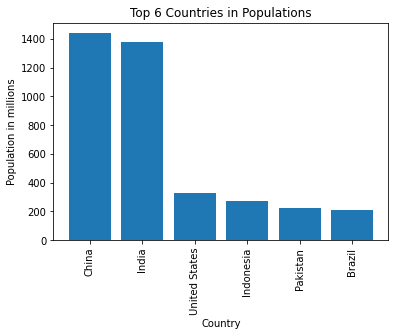

In [10]:
# Data visualization
plt.bar(x=Highest_Pop.index, height= (Highest_Pop.values/1000000))
plt.xticks(Highest_Pop.index, rotation=90)
plt.xlabel('Country')
plt.ylabel('Population in millions')
plt.title('Top 6 Countries in Populations')
plt.show()

### Research Question 2: Which countries had the highest number of total cases at that period ? 

In [11]:
df.head(1)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498


In [12]:
# Select the countries with the highest number of infected cases
Total_cases = df.groupby(['location'])['total_cases'].sum().nlargest(6)
labels1 = Total_cases.index
data1 = Total_cases.values

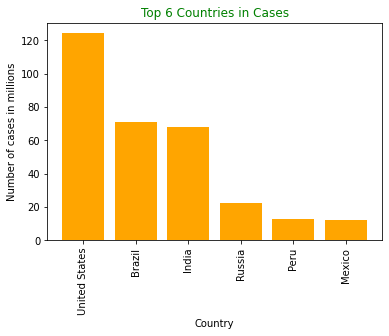

In [13]:
# Data visualization
plt.bar(x=labels1, height= data1/6000000,  color = 'orange')
plt.xticks(labels1, rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of cases in millions')
plt.title('Top 6 Countries in Cases', color = 'green')
plt.show()

### Research Question 3: Which countries had the highest number of death at that period ? 

In [14]:
# Select the countries with the highest number of deaths
Total_deaths = df.groupby(['location'])['total_deaths'].sum().nlargest(6)
labels2 = Total_deaths.index
data2 = Total_deaths.values

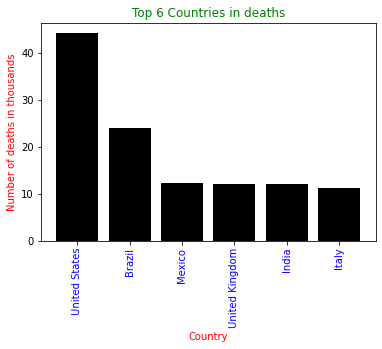

In [15]:
# Data visualization
plt.bar(x=labels2, height= data2/600000,  color = 'black')
plt.xticks(labels2, rotation = 90, color = 'blue')
plt.xlabel('Country', color = 'red')
plt.ylabel('Number of deaths in thousands', color = 'red')
plt.title('Top 6 Countries in deaths', color = 'green')
plt.show()

Let's have a look on total number of cases and total number of 

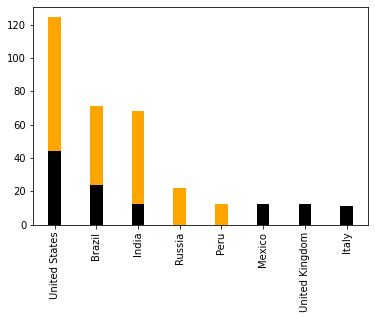

In [16]:
plt.bar(labels1, data1/6000000,  color = 'orange', width=0.3)
plt.bar(labels2, data2/600000,  color = 'black', width=0.3)
plt.xticks(rotation=90)
plt.show()

### Research Question 4: What the effect of the Covid_19 on economy ?

We can measure this effect by tracking the gdp_per_capita at the beginning of the disese and after that

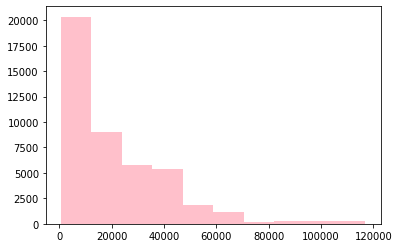

In [17]:
plt.hist(df['gdp_per_capita'], color='pink');

From the histogram distribution we notice that the gdp_per_capita starts with high values and then dcreases and this means that the economy has been efeected very negatively

Another Analysis

In [18]:
# At first let's extract the years out of the date column
df['year'] = df['date'].dt.year

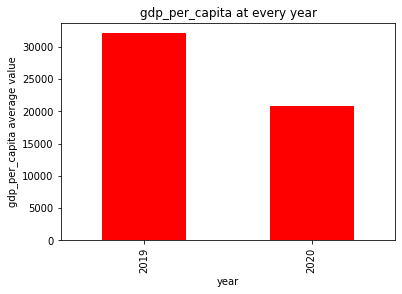

In [19]:
df.groupby(['year'])['gdp_per_capita'].mean().plot(kind='bar', color='red')
plt.title('gdp_per_capita at every year')
plt.ylabel('gdp_per_capita average value')
plt.show();

We can also notice that gdp_per_capita decrease significantly in the period from 2019 to 2020

### Research Question 5: Which countries did perfom well in the stringency index during the outbreak of covid-19 ?

Stringency index is a composite measure of response indicators, including school closures, workplace closures, and travel bans. It shows how strictly countries are following these measures to control the spread of covid-19.

In [20]:
Stringency_index= df.groupby(['location'])['stringency_index'].mean().nlargest(5)   

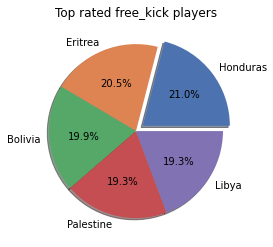

In [21]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('deep')
  
# plotting data on chart
plt.pie(Stringency_index.values, labels = Stringency_index.index,
        explode=[0.1, 0, 0, 0, 0] ,colors = palette_color,autopct ='%.1f%%', shadow = True)
plt.title("Top rated free_kick players")        
#  displaying chart
plt.show()

<a id='conclusions'></a>
## Conclusions

At first, We have loaded libraries required.
Then, we performed data cleaning (removed duplicates, removed rows with Nan values, modified data types). 
Finally, Pedrformed our data analysis by answering some questions :

Which countries did perfom well in the stringency index during the outbreak of covid-19 ?

What the effect of the Covid_19 on economy ?

Which countries had the highest number of death at that period ?

Which countries had the highest number of total cases at that period ?

Which countries had the highest population ?